## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("titanic_train.csv", index_col= "PassengerId")

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


AxesSubplot(0.125,0.125;0.62x0.755)


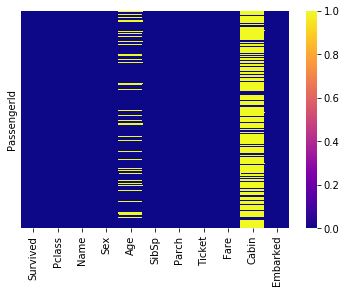

In [9]:
print(sns.heatmap(df.isnull(), cmap = "plasma", yticklabels= False))

AxesSubplot(0.125,0.125;0.775x0.755)


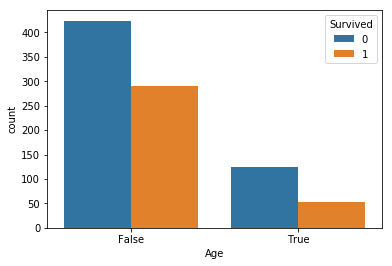

In [13]:
print(sns.countplot(df["Age"].isnull(), hue = df["Survived"]))

In [18]:
print(df["Age"].isnull().value_counts())

False    714
True     177
Name: Age, dtype: int64


## Variables Dummifying 

In [23]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
string_df = pd.DataFrame(data = df[["Name", "Ticket", "Cabin"]], columns=["Name", "Ticket", "Cabin"])

In [48]:
df.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


In [49]:
dummies = pd.get_dummies(data = df[["Sex", "Embarked"]])
dummies.drop(["Sex_female"], axis = 1, inplace = True)
dummies.head(2)

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,1,0,0,1
2,0,1,0,0


In [51]:
df = df.join(dummies, on = "PassengerId", )
df.drop(["Sex", "Embarked"], axis = 1, inplace = True)
df.tail(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
887,0,2,27.0,0,0,13.00,1,0,0,1
888,1,1,19.0,0,0,30.00,0,0,0,1
889,0,3,NaN,1,2,23.45,0,0,0,1
890,1,1,26.0,0,0,30.00,1,1,0,0
891,0,3,32.0,0,0,7.75,1,0,1,0


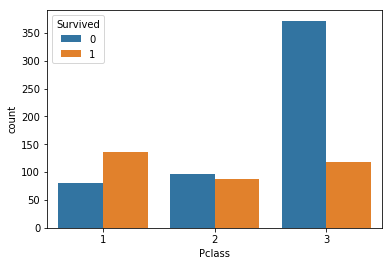

In [56]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])

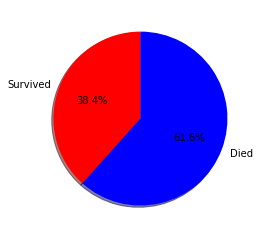

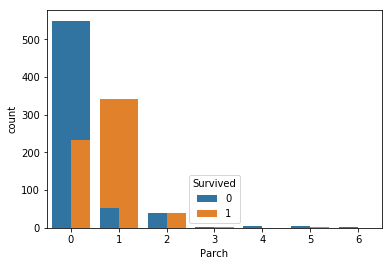

In [88]:
a = df["Survived"].value_counts()
for i in range(len(a+1)):
    liste = []
    res = a[i] / 891
    liste.append(res)
liste.append(1 - liste[0])
plt.pie(x =liste, colors = ["r", "b"], labels = ["Survived", "Died"], shadow= True,  startangle=90, autopct='%1.1f%%')
plt.show()


sns.countplot(x = df["Survived"])
sns.countplot(x = df["Parch"], hue = df["Survived"])

In [89]:
### End of First Commit

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64

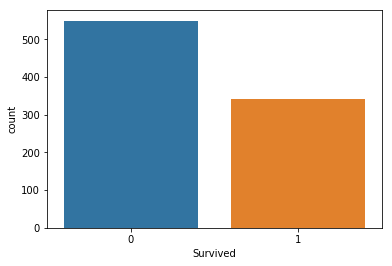

In [24]:
sns.countplot('Survived', data = df, orient='h' )
df["Survived"].value_counts()

([<matplotlib.patches.Wedge at 0x23a894d3208>,
 [Text(0.8899186877588753, 0.6465637858537406, 'oui'),
  Text(-0.8899186574910393, -0.6465638275138399, 'non')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.48541017681329407, -0.3526711786439127, '80.0%')])

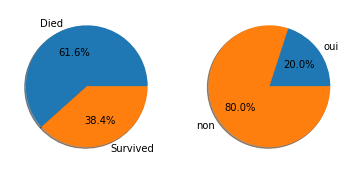

In [44]:
fig1, axes = plt.subplots(1,2)

x = [549/(549+342), 342/(549+342)]
labels = ["Died", "Survived"]
z = [20/100, 80/100]
labels2 = ["oui", "non"]

axes[0].pie(x, labels = labels, autopct='%1.1f%%', shadow=True)
axes[1].pie(z , labels = labels2,autopct='%1.1f%%', shadow=True)

    

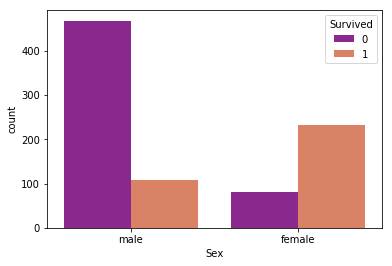

In [50]:
sns.countplot('Sex', hue = "Survived", data = df, palette = 'plasma',)

In [59]:

print("Sex proportion of survivals\n{}".format(df[df["Survived"] == 1]["Sex"].value_counts()))
print("\n")
print("Sex proportion of dead\n{}".format(df[df["Survived"] == 0]["Sex"].value_counts()))


Sex proportion of survivals
female    233
male      109
Name: Sex, dtype: int64


Sex proportion of dead
male      468
female     81
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Zebe2')

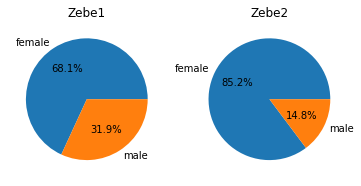

In [80]:
fig, axes = plt.subplots(1,2)

plt.title("Tetest")
axes[0].pie(x = [233/(233+109), 109/(233+109)], labels = ["female", "male"], autopct='%1.1f%%' )
axes[0].set_title("Zebe1")
axes[1].pie(x = [468/(468+81), 81/(81+468)], labels = ["female", "male"], autopct='%1.1f%%')
axes[1].set_title("Zebe2")

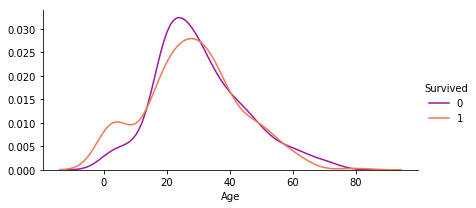

In [114]:
g = sns.FacetGrid(df, hue="Survived", palette = "plasma", aspect = 2)
g = g.map(sns.kdeplot, "Age")
g.add_legend()

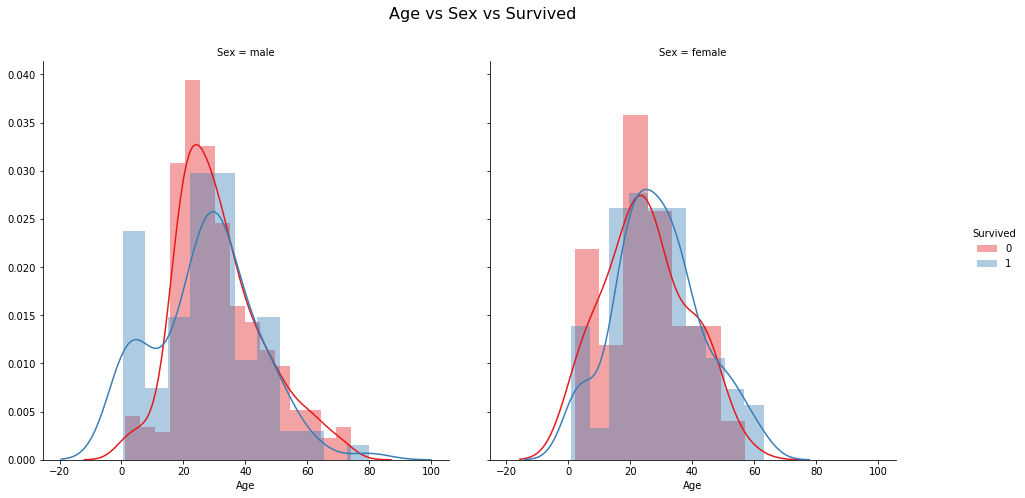

In [109]:
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1")
g.map(sns.distplot, "Age")
g = g.add_legend()
g.fig.suptitle('Age vs Sex vs Survived', fontsize=16)
g.fig.set_size_inches(15,8)

In [116]:
###End of second commit